In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("../input/flights.txt",delimiter = '|')

In [3]:
df

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,...,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,54548800,20020101,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles
1,55872300,20020101,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles
2,54388800,20020101,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles
3,54486500,20020101,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles
4,55878700,20020103,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191800,126750200,20130106,EV,ExpressJet Airlines Inc.: EV,N683BR,5272,ATL,AtlantaGA: Hartsfield-Jackson Atlanta Internat...,Atlanta,GA,...,1500.0,3.0,1523,1503.0,-20.0,146.0,135.0,0,0,721 miles
1191801,127294500,20130106,DL,Delta Air Lines Inc.: DL,N949DL,1711,ATL,AtlantaGA: Hartsfield-Jackson Atlanta Internat...,Atlanta,GA,...,2307.0,10.0,2321,2317.0,-4.0,151.0,150.0,False,F,731 miles
1191802,127294900,20130106,DL,Delta Air Lines Inc.: DL,N907DE,1810,ATL,AtlantaGA: Hartsfield-Jackson Atlanta Internat...,Atlanta,GA,...,1728.0,9.0,1750,1737.0,-13.0,153.0,140.0,F,False,731 miles
1191803,126594900,20130106,EV,ExpressJet Airlines Inc.: EV,N855AS,5208,ATL,AtlantaGA: Hartsfield-Jackson Atlanta Internat...,Atlanta,GA,...,1651.0,4.0,1658,1655.0,-3.0,102.0,101.0,False,F,508 miles


In [4]:
df.columns

Index(['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'AIRLINENAME', 'TAILNUM',
       'FLIGHTNUM', 'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME',
       'ORIGINSTATE', 'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME',
       'DESTCITYNAME', 'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME',
       'DEPDELAY', 'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME',
       'ARRTIME', 'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME',
       'CANCELLED', 'DIVERTED', 'DISTANCE'],
      dtype='object')

In [5]:
df.dtypes

TRANSACTIONID          int64
FLIGHTDATE             int64
AIRLINECODE           object
AIRLINENAME           object
TAILNUM               object
FLIGHTNUM              int64
ORIGINAIRPORTCODE     object
ORIGAIRPORTNAME       object
ORIGINCITYNAME        object
ORIGINSTATE           object
ORIGINSTATENAME       object
DESTAIRPORTCODE       object
DESTAIRPORTNAME       object
DESTCITYNAME          object
DESTSTATE             object
DESTSTATENAME         object
CRSDEPTIME             int64
DEPTIME              float64
DEPDELAY             float64
TAXIOUT              float64
WHEELSOFF            float64
WHEELSON             float64
TAXIIN               float64
CRSARRTIME             int64
ARRTIME              float64
ARRDELAY             float64
CRSELAPSEDTIME       float64
ACTUALELAPSEDTIME    float64
CANCELLED             object
DIVERTED              object
DISTANCE              object
dtype: object

In [6]:
df.drop_duplicates(subset=["TRANSACTIONID","FLIGHTDATE","AIRLINECODE","AIRLINENAME","DISTANCE","FLIGHTNUM"], keep="last", inplace = True)
df.dropna(subset=["DISTANCE","AIRLINENAME","DEPDELAY","ARRDELAY","CANCELLED"],inplace=True)

In [7]:
df['ScheduleMismatch'] = df['ACTUALELAPSEDTIME'] - df['CRSELAPSEDTIME']

In [8]:
dfgroup = df.groupby('AIRLINENAME').agg({
    'DEPDELAY': 'mean',  
    'ARRDELAY': 'mean',
    'ScheduleMismatch': 'mean'
}).reset_index()

In [9]:
dfgroup = dfgroup.rename(columns={'DEPDELAY': 'MeanDepartureDelay'})
dfgroup = dfgroup.rename(columns={'ARRDELAY': 'MeanArrivalDelay'})
dfgroup = dfgroup.rename(columns={'ScheduleMismatch': 'AverageScheduleMismatch'})

In [10]:
dfgroup

,AIRLINENAME,MeanDepartureDelay,MeanArrivalDelay,AverageScheduleMismatch
0,ATA Airlines d/b/a ATA: TZ,4.091298,4.835235,0.743937
1,AirTran Airways Corporation: FL,4.707309,2.428465,-2.278844
2,Alaska Airlines Inc.: AS,4.028449,3.055180,-0.973269
3,Aloha Airlines Inc.: AQ,0.737013,1.319805,0.582792
4,America West Airlines Inc.: HP (Merged with US...,7.927489,7.346846,-0.580643
5,American Airlines Inc.: AA,7.285445,4.793624,-2.491821
6,Comair Inc.: OH (1),9.091121,7.150264,-1.940857
7,Continental Air Lines Inc.: CO,6.282276,5.417207,-0.865069
8,Delta Air Lines Inc.: DL,6.855293,4.757881,-1.797003
9,Endeavor Air Inc.: 9E,4.527049,1.722666,-2.804384


In [11]:
X = dfgroup.iloc[:,1:]

In [12]:
sc = StandardScaler()

In [13]:
X_scaled = sc.fit_transform(X)

In [14]:
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

C:\Users\sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

In [15]:
best_k = K[np.argmax(silhouette_scores)]

In [16]:
kmeans = KMeans(n_clusters=best_k, random_state=0)
dfgroup['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\sebastian\anaconda3\envs\web\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
dfgroup

,AIRLINENAME,MeanDepartureDelay,MeanArrivalDelay,AverageScheduleMismatch,Cluster
0,ATA Airlines d/b/a ATA: TZ,4.091298,4.835235,0.743937,5
1,AirTran Airways Corporation: FL,4.707309,2.428465,-2.278844,1
2,Alaska Airlines Inc.: AS,4.028449,3.055180,-0.973269,1
3,Aloha Airlines Inc.: AQ,0.737013,1.319805,0.582792,0
4,America West Airlines Inc.: HP (Merged with US...,7.927489,7.346846,-0.580643,4
5,American Airlines Inc.: AA,7.285445,4.793624,-2.491821,1
6,Comair Inc.: OH (1),9.091121,7.150264,-1.940857,4
7,Continental Air Lines Inc.: CO,6.282276,5.417207,-0.865069,1
8,Delta Air Lines Inc.: DL,6.855293,4.757881,-1.797003,1
9,Endeavor Air Inc.: 9E,4.527049,1.722666,-2.804384,1


In [18]:
cluster_analysis = dfgroup.groupby('Cluster').mean(numeric_only=True)

In [19]:
print("Número óptimo de clústeres:", best_k)
print(cluster_analysis)

Número óptimo de clústeres: 7
         MeanDepartureDelay  MeanArrivalDelay  AverageScheduleMismatch
Cluster                                                               
0                 -0.053227          0.600615                 0.653842
1                  5.567431          3.774926                -1.767967
2                 10.229268          7.115597                -3.113671
3                  8.498856          3.927701                -4.571155
4                  8.396326          7.114976                -1.281350
5                  4.869516          5.224581                 0.355065
6                 14.541790         12.792527                -1.749263


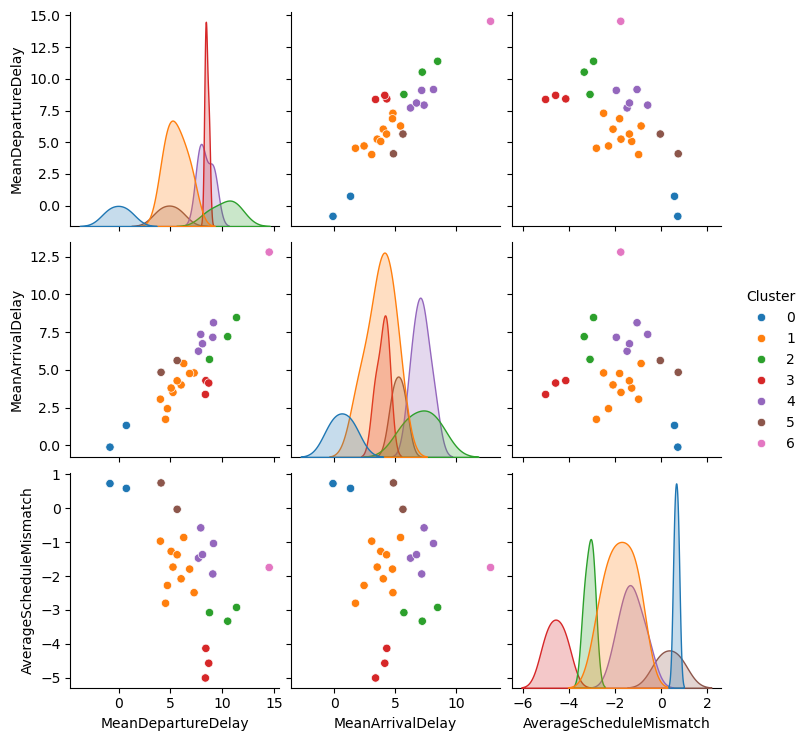

In [20]:
sns.pairplot(dfgroup,hue="Cluster", palette="tab10")
# cluster0
# este grupo presenta un desempeño muy puntual, con un ligero adelanto en las salidas y un mínimo retraso en las llegadas. 
# El desajuste del horario indica que los vuelos tienden a llegar despues de lo programado
# cluster1
# un retraso de salida moderado y un retraso de llegada menor. El desajuste de horario indica que los vuelos llegan más temprano de lo programado
# cluster2
# Los vuelos en este grupo experimentan retrasos significativos tanto en salidas como en llegadas, con un alto desajuste negativo en el horario,
# significa que llegan antes de lo programado
# cluster3
# Similar al clúster 2, pero con un desajuste de horario más negativo, indicando un desempeño particularmente bueno en términos de ajustarse 
# a lo programado
# cluster4
# también muestra retrasos significativos pero con un desajuste de horario negativo menos severo comparado con los clústeres 2 y 3
# cluster5
# los vuelos en este grupo tienen retrasos moderados, tanto en salidas como en llegadas, con un leve desajuste positivo en el horario
# cluster6
# tiene los peores retrasos, con valores extremadamente altos tanto en salidas como en llegadas, y un desajuste de horario significativo